In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import pickle
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [19]:
df = pd.read_csv(r"C:\Users\hilla.HILLARY\OneDrive\Desktop\Amdari\01-Session 1\reder-prediction\reder-prediction\EDA\clean_train_data.csv")
df.head()

,Age,Location,Segment,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,numEmails,numCalls,numChats,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Rating,AVGOpenDays,AVGClickDays,Gender_Female,Gender_Male,TotalInteractionType_Call,TotalInteractionType_Call|Chat,TotalInteractionType_Call|Chat|Email,TotalInteractionType_Call|Email,TotalInteractionType_Chat,TotalInteractionType_Chat|Email,TotalInteractionType_Email,Frequency_Daily,Frequency_Monthly,Frequency_Weekly,Timestamp_Year,Timestamp_Month,Timestamp_Day,Start_Date_Year,Start_Date_Month,Start_Date_Day,End_Date_Year,End_Date_Month,End_Date_Day,FirstInteractionDate_Year,FirstInteractionDate_Month,FirstInteractionDate_Day,LastInteractionDate_Year,LastInteractionDate_Month,LastInteractionDate_Day,most_recent_action_date_Year,most_recent_action_date_Month,most_recent_action_date_Day
0,31,3155.59500,1,3,1,38,3994.72,3994.72,6,1,1,2,13.333333,3,49,15,24,13,19,1,818.0,319.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,1,27,2020,6,8,2022,10,27,2019,9,26,2021,7,25,2022,11,7
1,66,1477.07750,2,6,0,4,2844.35,2844.35,12,10,5,4,3.333333,3,100,9,24,13,9,2,110.0,88.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019,1,6,2021,7,21,2022,5,7,2019,1,12,2022,12,13,2022,12,5
2,36,1866.52000,1,3,0,14,1866.52,1866.52,5,1,1,1,2.666667,3,1,97,12,7,19,4,333.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2019,4,30,2019,10,5,2020,8,19,2019,10,9,2022,1,4,2022,11,2
3,62,2473.60000,2,1,1,28,1378.64,1378.64,15,18,17,24,26.333333,3,25,31,47,14,4,1,159.0,423.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,3,3,2020,1,14,2022,3,27,2019,1,3,2022,11,10,2022,12,8
4,68,3795.52375,2,3,0,39,2425.05,2425.05,0,5,4,1,0.666667,3,77,51,30,12,12,3,193.0,96.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019,4,5,2021,4,8,2022,11,9,2019,4,10,2022,12,19,2022,12,30


In [20]:
X = df.drop(columns='ChurnLabel')
y = df['ChurnLabel']

In [21]:
# splitting our data into 70% train set and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
df.head()

,Age,Location,Segment,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,numEmails,numCalls,numChats,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Rating,AVGOpenDays,AVGClickDays,Gender_Female,Gender_Male,TotalInteractionType_Call,TotalInteractionType_Call|Chat,TotalInteractionType_Call|Chat|Email,TotalInteractionType_Call|Email,TotalInteractionType_Chat,TotalInteractionType_Chat|Email,TotalInteractionType_Email,Frequency_Daily,Frequency_Monthly,Frequency_Weekly,Timestamp_Year,Timestamp_Month,Timestamp_Day,Start_Date_Year,Start_Date_Month,Start_Date_Day,End_Date_Year,End_Date_Month,End_Date_Day,FirstInteractionDate_Year,FirstInteractionDate_Month,FirstInteractionDate_Day,LastInteractionDate_Year,LastInteractionDate_Month,LastInteractionDate_Day,most_recent_action_date_Year,most_recent_action_date_Month,most_recent_action_date_Day
0,31,3155.59500,1,3,1,38,3994.72,3994.72,6,1,1,2,13.333333,3,49,15,24,13,19,1,818.0,319.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,1,27,2020,6,8,2022,10,27,2019,9,26,2021,7,25,2022,11,7
1,66,1477.07750,2,6,0,4,2844.35,2844.35,12,10,5,4,3.333333,3,100,9,24,13,9,2,110.0,88.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019,1,6,2021,7,21,2022,5,7,2019,1,12,2022,12,13,2022,12,5
2,36,1866.52000,1,3,0,14,1866.52,1866.52,5,1,1,1,2.666667,3,1,97,12,7,19,4,333.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2019,4,30,2019,10,5,2020,8,19,2019,10,9,2022,1,4,2022,11,2
3,62,2473.60000,2,1,1,28,1378.64,1378.64,15,18,17,24,26.333333,3,25,31,47,14,4,1,159.0,423.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,3,3,2020,1,14,2022,3,27,2019,1,3,2022,11,10,2022,12,8
4,68,3795.52375,2,3,0,39,2425.05,2425.05,0,5,4,1,0.666667,3,77,51,30,12,12,3,193.0,96.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019,4,5,2021,4,8,2022,11,9,2019,4,10,2022,12,19,2022,12,30


# Training a Base Model

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)

In [24]:
round(score * 100, 2)

96.48

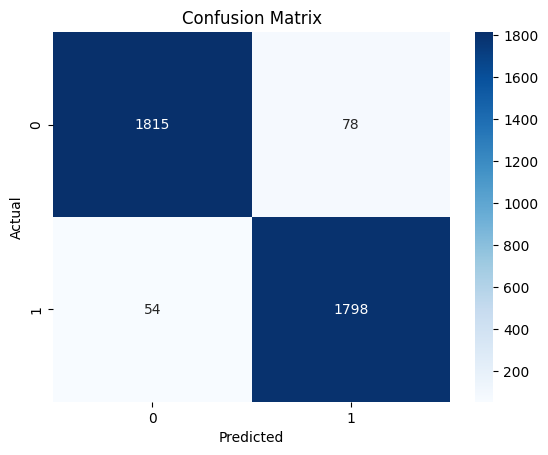

In [25]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap='Blues', annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
{
    "precision_score": round(precision_score(y_pred, y_test) * 100, 2),
    "recall_score": round(recall_score(y_pred, y_test) * 100, 2)
}

{'precision_score': 95.84, 'recall_score': 97.08}

# Hyperparamater Tuning for Logistics Regression

## GridSeachCV

In [28]:
from sklearn.model_selection import GridSearchCV
import pickle

param_dist = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "solver": ['saga', 'sag', 'newton-cholesky'],
    "max_iter": [100, 200, 300]
}

model = LogisticRegression(random_state= 42, n_jobs = 1)
random_search = GridSearchCV(model, param_grid = param_dist, cv = 4)

random_search.fit(X_train, y_train)
best_param = random_search.best_params_
best_model = random_search.best_estimator_

print(best_param)

y_pred = best_model.predict(X_test)
score = accuracy_score(y_pred, y_test)


{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}


## RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "solver": ['saga', 'sag', 'newton-cholesky'],
    "max_iter": [100, 200, 300]
}

model = LogisticRegression(random_state= 42, n_jobs = 1)
random_search = RandomizedSearchCV(model, param_distributions = param_dist, cv = 4, random_state=42)

random_search.fit(X_train, y_train)
best_param = random_search.best_params_
best_model = random_search.best_estimator_

print(best_param)

y_pred = best_model.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 200}


0.9214953271028037